**Import Libraries**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#SKLearn Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

**Load Dataset**

In [2]:
df = pd.read_csv('/kaggle/input/age-weight-height-bmi-analysis/bmi.csv')

In [3]:
df.head()

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,Obese Class 1
1,60,1.71,79.02,27.023700,Overweight
2,60,1.55,74.70,31.092612,Obese Class 1
3,60,1.46,35.90,16.841809,Underweight
4,60,1.58,97.10,38.896010,Obese Class 2


In [4]:
df.shape

(741, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       741 non-null    int64  
 1   Height    741 non-null    float64
 2   Weight    741 non-null    float64
 3   Bmi       741 non-null    float64
 4   BmiClass  741 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 29.1+ KB


**Dataset Summary**

In [6]:
cats = df.select_dtypes(include='object').columns.tolist()
nums = df.select_dtypes(exclude='object').columns.tolist()

In [7]:
df[cats].describe()

,BmiClass
count,741
unique,6
top,Normal Weight
freq,342


In [8]:
df[nums].describe()

,Age,Height,Weight,Bmi
count,741.000000,741.000000,741.000000,741.000000
mean,31.618084,1.709427,78.412497,26.365427
std,11.655466,0.085974,32.254547,9.223191
min,15.000000,1.460000,25.900000,12.150497
25%,22.000000,1.670000,63.000000,22.129740
50%,29.000000,1.721000,72.900000,24.132412
75%,40.000000,1.751000,83.300000,27.249306
max,61.000000,2.070000,270.000000,66.301350


**Data Visualization**

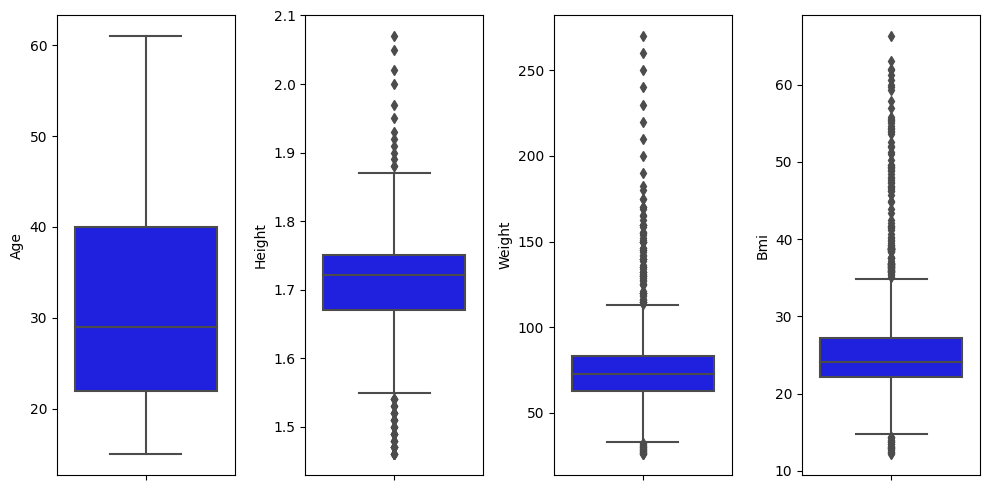

In [9]:
plt.figure(figsize=(10,5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='blue', orient='v')
    plt.tight_layout()

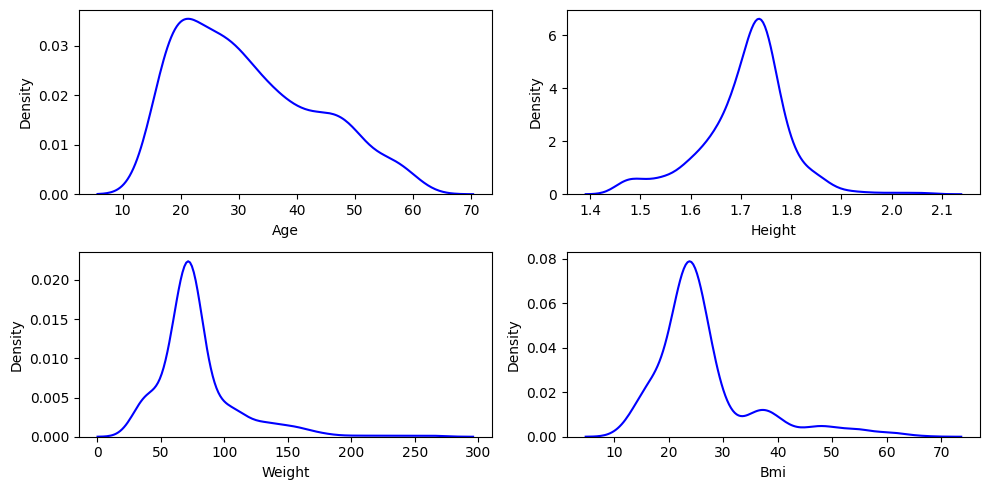

In [10]:
plt.figure(figsize=(10,5))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums)//2, i+1)
    sns.kdeplot(df[nums[i]], color='blue')
    plt.tight_layout()

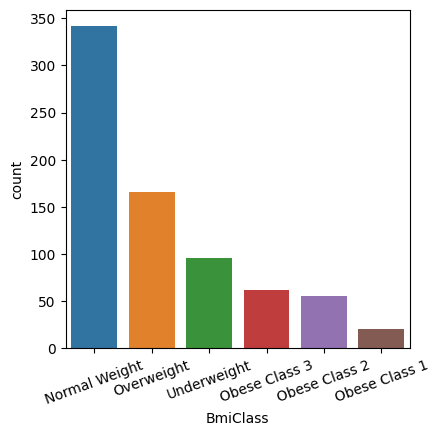

In [11]:
plt.figure(figsize=(12,8))

for i in range(0, len(cats)):
    plt.subplot(2,3,i+1)
    sns.countplot(x=df[cats[i]], order=df[cats[i]].value_counts().index)
    plt.xlabel(cats[i])
    plt.xticks(rotation=20)
    plt.tight_layout()

<Axes: >

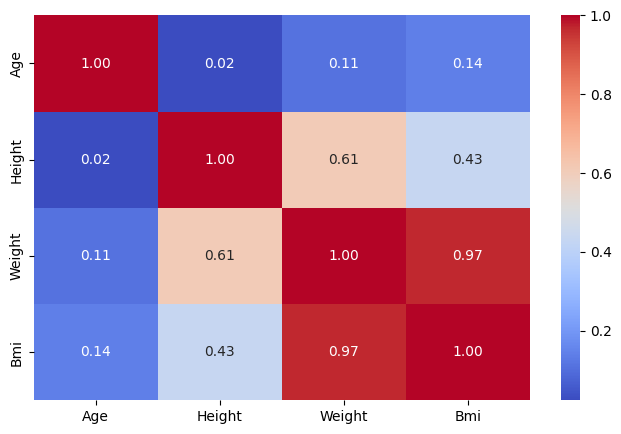

In [12]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[nums].corr(), cmap='coolwarm', annot=True, fmt='.2f')

**Label Encoder**

In [13]:
label_encoder = LabelEncoder()
df['BmiClass'] = label_encoder.fit_transform(df['BmiClass'])
df.head()

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,1
1,60,1.71,79.02,27.023700,4
2,60,1.55,74.70,31.092612,1
3,60,1.46,35.90,16.841809,5
4,60,1.58,97.10,38.896010,2


**Classification using Logistic Regression**

In [14]:
#Create x & y and split into train and test
x = df.drop('BmiClass', axis=1)
y = df['BmiClass']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [15]:
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (592, 4)
X_test shape:  (149, 4)
y_train shape:  (592,)
y_test shape:  (149,)


In [16]:
#Train model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

#Predictions
y_pred_log = log_reg.predict(X_test)

#Evaluate model and show the score
print('Accuracy score: ',accuracy_score(y_test, y_pred_log))
print('Classification report')
print(classification_report(y_test, y_pred_log))

Accuracy score:  0.6778523489932886
Classification report
              precision    recall  f1-score   support

           0       0.73      0.95      0.83        62
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        14
           3       0.53      0.73      0.62        11
           4       0.52      0.45      0.48        31
           5       0.87      0.77      0.82        26

    accuracy                           0.68       149
   macro avg       0.44      0.48      0.46       149
weighted avg       0.60      0.68      0.63       149



In [17]:
score = cross_val_score(log_reg, x, y, cv=5)
score.mean()

0.6571286051151823

**Linear Regression**

In [18]:
#Create x & y and split into train and test
x = df[['Age', 'Height', 'Weight']]
y = df['Bmi']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [19]:
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (592, 3)
X_test shape:  (149, 3)
y_train shape:  (592,)
y_test shape:  (149,)


In [20]:
#Train model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#Predictions
y_pred_lin = lin_reg.predict(X_test)

#Evaluate model and show the score
print('Mean Squared Error: ',mean_squared_error(y_test, y_pred_lin))
print('R-Squared: ',r2_score(y_test, y_pred_lin))

Mean Squared Error:  2.3731065115176837
R-Squared:  0.9711229740615392


In [21]:
score = cross_val_score(lin_reg, x, y, cv=5)
score.mean()

0.959927277613291

**Random Forest**

In [22]:
#Create x & y and split into train and test
x = df.drop('BmiClass', axis=1)
y = df['BmiClass']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [23]:
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (592, 4)
X_test shape:  (149, 4)
y_train shape:  (592,)
y_test shape:  (149,)


In [24]:
#Train model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

#Predictions
y_pred_forest = random_forest.predict(X_test)

#Evaluate model and show score
print('Accuracy score: ',accuracy_score(y_test, y_pred_forest))
print('Classification report')
print(classification_report(y_test, y_pred_forest))

Accuracy score:  1.0
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        26

    accuracy                           1.00       149
   macro avg       1.00      1.00      1.00       149
weighted avg       1.00      1.00      1.00       149



In [25]:
score = cross_val_score(random_forest, x, y, cv=5)
score.mean()

0.997306366769454